In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/tmp/ipykernel_1105/2324892354.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-11 09:08:12.063371: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 09:08:12.063468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 09:08:12.515520: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable t

In [2]:
def load_dataset(csv_path):
    df = pd.read_csv(csv_path, sep=';')
    print("Actual columns in DataFrame:", df.columns)
    required_columns = ['Azimuth', 'Altitude', 'Timestamp']

    if not all(col in df.columns for col in required_columns):
        raise ValueError("Required columns are not present in the DataFrame.")
    
    X = df[['Azimuth', 'Altitude']].values
    y_azimuth = df['Azimuth'].values
    y_altitude = df['Altitude'].values
    timestamps = df['Timestamp'].values
    return X, y_azimuth, y_altitude, timestamps, df

csv_path = '/root/solar_tracking_1/Training/cleaned_data/solar_data_january_1min_2023_timestamp.csv'
X, y_azimuth, y_altitude, timestamps, df = load_dataset(csv_path)


Actual columns in DataFrame: Index(['Timestamp', 'Azimuth', 'Altitude', 'Latitude', 'Longitude'], dtype='object')


In [3]:
# Pisahkan data azimuth dan altitude
X_azimuth = X
X_altitude = X
y_azimuth_train, y_azimuth_test, X_azimuth_train, X_azimuth_test, timestamps_azimuth_train, timestamps_azimuth_test = train_test_split(y_azimuth, X_azimuth, timestamps, test_size=0.2, random_state=42)
y_altitude_train, y_altitude_test, X_altitude_train, X_altitude_test, timestamps_altitude_train, timestamps_altitude_test = train_test_split(y_altitude, X_altitude, timestamps, test_size=0.2, random_state=42)

# Normalisasi data
X_azimuth_train_normalized = (X_azimuth_train - X_azimuth_train.mean()) / X_azimuth_train.std()
X_azimuth_test_normalized = (X_azimuth_test - X_azimuth_train.mean()) / X_azimuth_train.std()

X_altitude_train_normalized = (X_altitude_train - X_altitude_train.mean()) / X_altitude_train.std()
X_altitude_test_normalized = (X_altitude_test - X_altitude_train.mean()) / X_altitude_train.std()

In [4]:
# Buat model untuk azimuth
model_azimuth = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_azimuth.compile(optimizer='adam', loss='mean_squared_error')
model_azimuth.fit(X_azimuth_train_normalized, y_azimuth_train, epochs=50, batch_size=32, validation_split=0.2)

2024-02-11 09:08:27.666651: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-11 09:08:30.288899: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-11 09:08:30.288967: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-11 09:08:30.292825: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-11 09:08:30.292937: I external/local_xla/xla/stream_executor

Epoch 1/50


2024-02-11 09:08:35.818386: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-11 09:08:37.622286: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fdcbe7903f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-11 09:08:37.622442: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Compute Capability 7.5
2024-02-11 09:08:37.833504: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-11 09:08:38.197769: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1707617318.469822    1552 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


864/864 [==============================] - 12s 5ms/step - loss: 1531.6278 - val_loss: 0.0018
Epoch 2/50
864/864 [==============================] - 4s 5ms/step - loss: 8.9913e-04 - val_loss: 2.7939e-04
Epoch 3/50
864/864 [==============================] - 4s 5ms/step - loss: 1.6335e-04 - val_loss: 6.5533e-05
Epoch 4/50
864/864 [==============================] - 4s 5ms/step - loss: 4.1438e-05 - val_loss: 1.8385e-05
Epoch 5/50
864/864 [==============================] - 5s 5ms/step - loss: 1.2835e-05 - val_loss: 6.3744e-06
Epoch 6/50
864/864 [==============================] - 5s 6ms/step - loss: 4.3205e-06 - val_loss: 2.5278e-06
Epoch 7/50
864/864 [==============================] - 5s 6ms/step - loss: 1.5979e-06 - val_loss: 1.6519e-06
Epoch 8/50
864/864 [==============================] - 5s 6ms/step - loss: 7.9962e-07 - val_loss: 4.5394e-07
Epoch 9/50
864/864 [==============================] - 5s 5ms/step - loss: 1.7211e-05 - val_loss: 2.6668e-04
Epoch 10/50
864/864 [======================

In [5]:
# Buat model untuk altitude
model_altitude = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_altitude.compile(optimizer='adam', loss='mean_squared_error')
model_altitude.fit(X_altitude_train_normalized, y_altitude_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
864/864 [==============================] - 6s 6ms/step - loss: 102.0811 - val_loss: 0.0023
Epoch 2/50
864/864 [==============================] - 5s 5ms/step - loss: 8.9585e-04 - val_loss: 2.9754e-04
Epoch 3/50
864/864 [==============================] - 5s 5ms/step - loss: 0.0191 - val_loss: 9.8421e-05
Epoch 4/50
864/864 [==============================] - 5s 6ms/step - loss: 0.0677 - val_loss: 1.9294e-04
Epoch 5/50
864/864 [==============================] - 5s 5ms/step - loss: 0.0600 - val_loss: 0.0102
Epoch 6/50
864/864 [==============================] - 5s 6ms/step - loss: 0.0712 - val_loss: 0.0059
Epoch 7/50
864/864 [==============================] - 5s 5ms/step - loss: 0.0689 - val_loss: 0.1202
Epoch 8/50
864/864 [==============================] - 5s 5ms/step - loss: 0.0323 - val_loss: 0.0075
Epoch 9/50
864/864 [==============================] - 5s 5ms/step - loss: 0.0655 - val_loss: 0.0017
Epoch 10/50
864/864 [==============================] - 5s 6ms/step - loss: 0.0827 

In [6]:
# Evaluasi model azimuth pada data test
predictions_azimuth = model_azimuth.predict(X_azimuth_test_normalized)
mse_azimuth = mean_squared_error(y_azimuth_test, predictions_azimuth)
print(f'Mean Squared Error for Azimuth: {mse_azimuth}')

# Evaluasi model altitude pada data test
predictions_altitude = model_altitude.predict(X_altitude_test_normalized)
mse_altitude = mean_squared_error(y_altitude_test, predictions_altitude)
print(f'Mean Squared Error for Altitude: {mse_altitude}')

271/271 [==============================] - 1s 2ms/step
Mean Squared Error for Azimuth: 7.057901564257601e-06
271/271 [==============================] - 1s 2ms/step
Mean Squared Error for Altitude: 0.006387638634373307


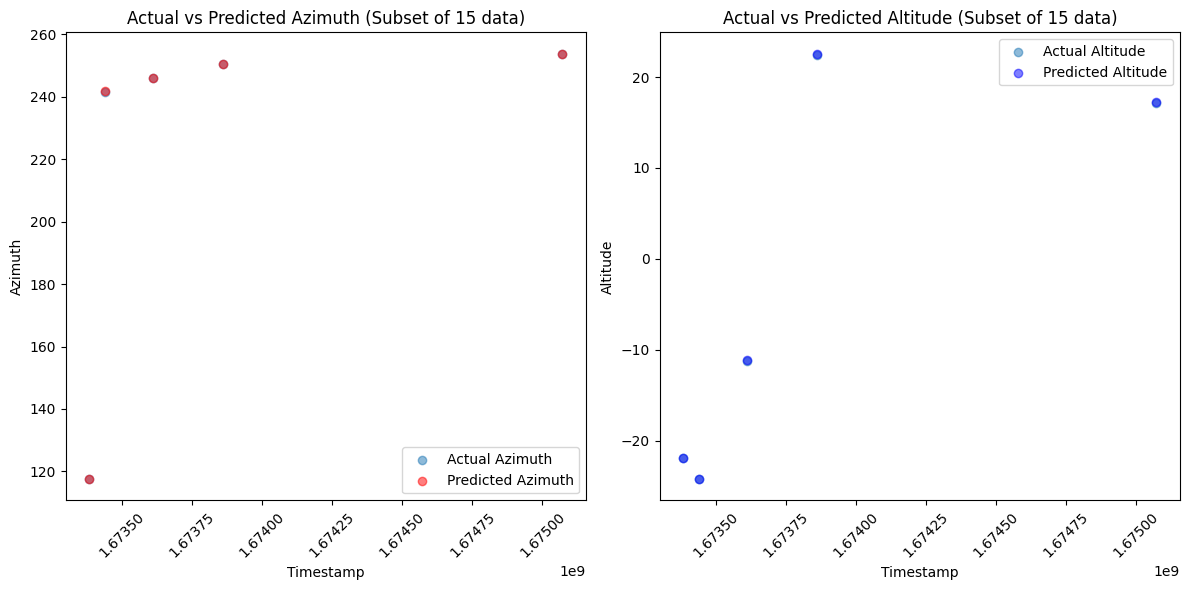

In [7]:

# Plot hasil prediksi dan data aktual untuk 10 data azimuth
plt.figure(figsize=(12, 6))

# Ambil hanya 10 data
num_data_to_plot = 5
X_azimuth_test_subset = X_azimuth_test[:num_data_to_plot]
y_azimuth_test_subset = y_azimuth_test[:num_data_to_plot]

# Plot azimuth aktual
plt.subplot(1, 2, 1)
plt.scatter(timestamps_azimuth_test[:num_data_to_plot], y_azimuth_test_subset, label='Actual Azimuth', alpha=0.5)
plt.scatter(timestamps_azimuth_test[:num_data_to_plot], predictions_azimuth[:num_data_to_plot], label='Predicted Azimuth', color='red', alpha=0.5)
plt.title('Actual vs Predicted Azimuth (Subset of 15 data)')
plt.xlabel('Timestamp')
plt.ylabel('Azimuth')
plt.xticks(rotation=45)
plt.legend()

# Plot altitude aktual
plt.subplot(1, 2, 2)
plt.scatter(timestamps_altitude_test[:num_data_to_plot], y_altitude_test[:num_data_to_plot], label='Actual Altitude', alpha=0.5)
plt.scatter(timestamps_altitude_test[:num_data_to_plot], predictions_altitude[:num_data_to_plot], label='Predicted Altitude', color='blue', alpha=0.5)
plt.title('Actual vs Predicted Altitude (Subset of 15 data)')
plt.xlabel('Timestamp')
plt.ylabel('Altitude')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()